# Hearing loss prediction model project

### Data

The data we are going to use is an experimental data of 5000 participants to study the effect of age and physical health on hearing loss. In this scenario the data tends to incline on the ability of the participants to hear high pitched tones.
We are going to then build a model that will predict someone's likelyhood to hear a high prequency sound based solely on their age and physical score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('DATA/hearing_test.csv')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


Let us see how many people pass the test

In [ ]:
df['test_result'].value_count()

Ploting to visualize to relationship

In [ ]:
sns.countplot(data=df,x='test_result')

View the distribution of the features per category

<AxesSubplot:xlabel='test_result', ylabel='age'>

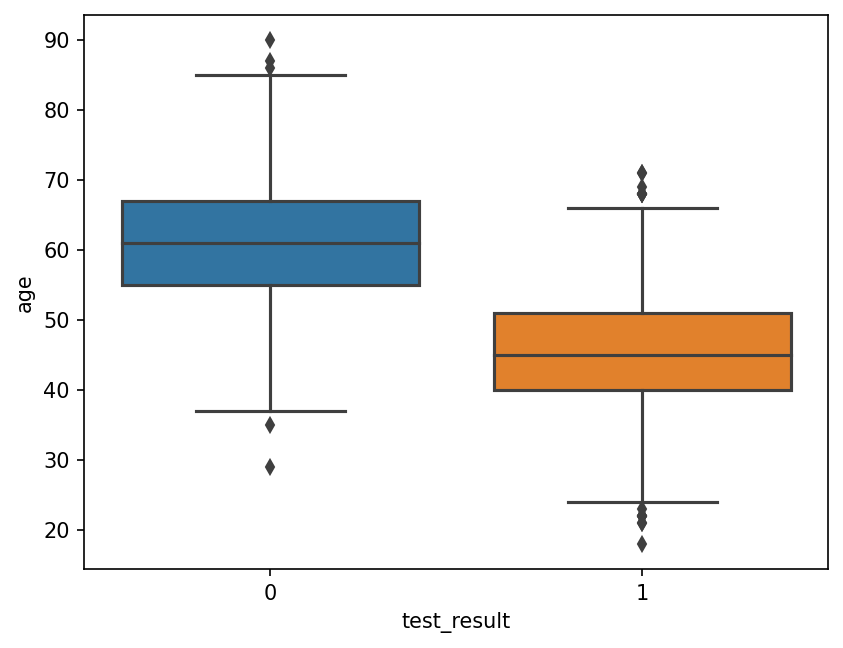

In [8]:
plt.figure(dpi=150)
sns.boxplot(data=df,x='test_result',y='age')

From the above plot we can see that people who do not pass the test tend to be older than those who pass the test

<AxesSubplot:xlabel='age', ylabel='physical_score'>

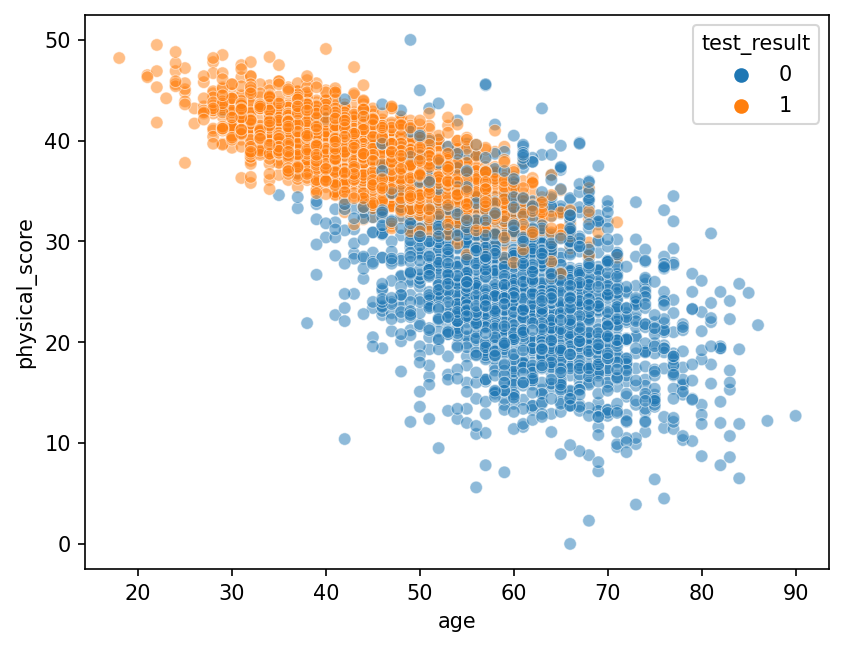

In [14]:
plt.figure(dpi=150)
sns.scatterplot(data=df,x="age",y="physical_score", hue="test_result", alpha=0.5)

The *Orange* Colour shows the people that passed the test, most of the are less than 50 years.

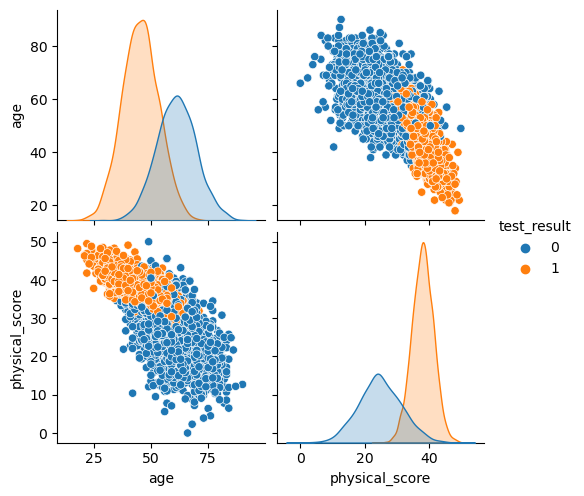

In [15]:
sns.pairplot(data=df,hue="test_result")

<AxesSubplot:>

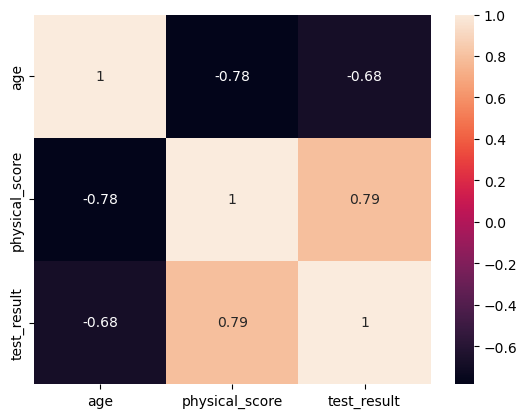

In [16]:
sns.heatmap(df.corr(),annot=True)

The test_result and pysical_score are 79% possitively correlated and on the contrary, age is 78% negatively correlated to 
physical score and 68% negatively correlated to test_result.

#### Let us see the relationship between physcial_score and test_result 

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

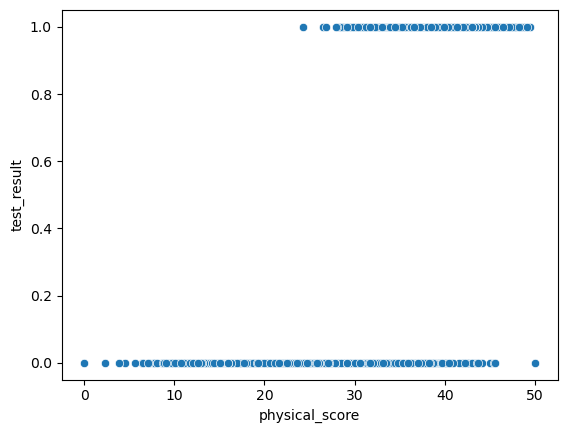

In [17]:
sns.scatterplot(data=df, x="physical_score", y="test_result")

The above visual is looking less informative, we may need to try a 3D plot see the detailed information about the relationship

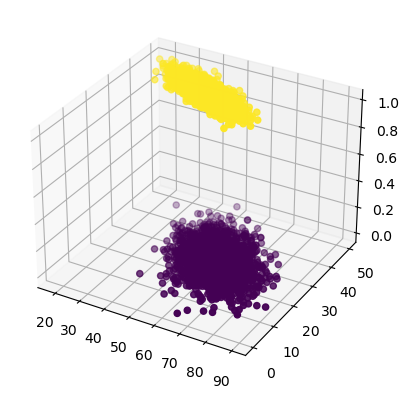

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df['age'],df['physical_score'],df['test_result'], c=df['test_result'])

In [25]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

* We ahve no null values in our dataset.
* Outliers are not extreme, so no need of removal

### Training the Model

Remove the "test_result" column from the dataframe

In [26]:
X = df.drop('test_result', axis = 1)

assign a y value to the "test_result" column

In [28]:
y = df['test_result']

In [29]:
from sklearn.model_selection import train_test_split   # Training Algorithm

In [32]:
from sklearn.preprocessing import StandardScaler   # Data scaling tool

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [35]:
scaler = StandardScaler()  # naming it with a short word

The Scaler scales all the training data to 0-1

In [36]:
scaled_X_train = scaler.fit_transform(X_train)

In [37]:
scaled_X_test = scaler.fit_transform(X_test)

#### Create the Logistic regression model

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_model = LogisticRegression()

Fit the model to the training data

In [41]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [42]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

The coeficients above means that age has negative relationship with test_result and physical_score has positive relationship with test_score.

#### start prediction

In [43]:
y_pred = log_model.predict(scaled_X_test)

In [44]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
y_pred = log_model.predict(scaled_X_test)

In [48]:
accuracy_score(y_test,y_pred)

0.924

Since we know that there is an accuracy paradox, we shouldn't be so happy about this accuracy level, we need to dive more

In [49]:
confusion_matrix(y_test,y_pred)

array([[173,  20],
       [ 18, 289]], dtype=int64)

In [51]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\Amiru Adbulkarim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


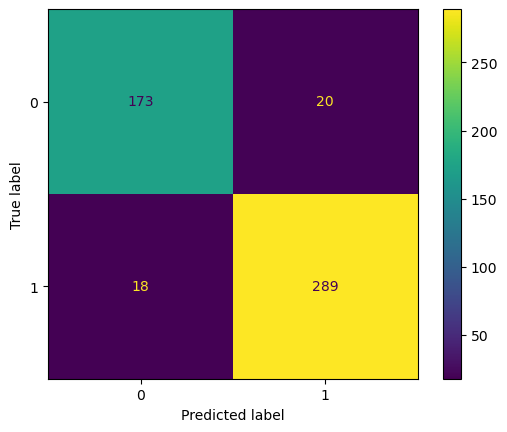

In [52]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [53]:
len(y_test)

500

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.94      0.94      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



Since the precision and recall values aren't far off the accuracy value, then we can say that our data isn't inbalanced and we can now rely on the accuracy we got in line[48]

In [56]:
from sklearn.metrics import precision_score, recall_score

In [57]:
precision_score(y_test,y_pred)

0.9352750809061489

In [58]:
recall_score(y_test,y_pred)

0.9413680781758957

We can see that the basic classification model performance metrics have indicated that the model has high performance

#### Plot the ROC(Reciever operator characteristics) curve

In [59]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

C:\Users\Amiru Adbulkarim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


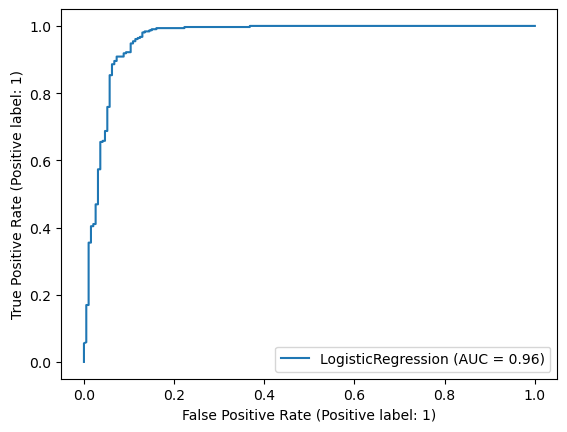

In [60]:
plot_roc_curve(log_model,scaled_X_test,y_test)

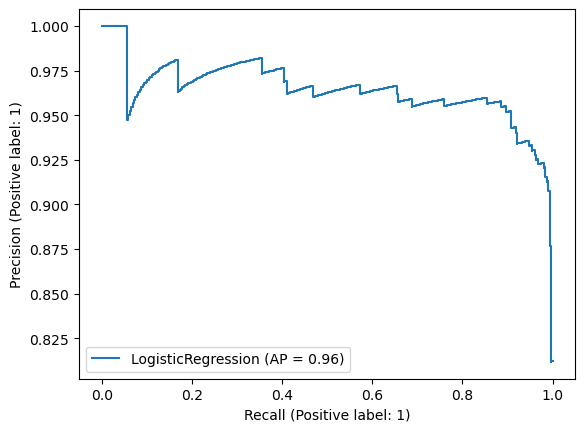

In [62]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [70]:
log_model.predict_proba(scaled_X_test)[0] # The model predict that this test_score is 97% probability that it's a 1

array([0.03092672, 0.96907328])

In [71]:
y_test[0]  # Testing with the actual data we got a 1

1

In [72]:
import joblib

In [73]:
joblib.dump(log_model,"hearing_loss_pediction_model.joblib")

['hearing_loss_pediction_model.joblib']